# Import librairies

In [1]:
import pandas as pd
from ydata_profiling import ProfileReport
import glob
import chardet
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
sys.path.append('../src')
import src

In [3]:
import matplotlib 
print(matplotlib.__version__)

3.5.2


# Study of the complementary dataframe about salary

In [4]:
df_sal = pd.read_csv ("net_salary_per_town_categories.csv")
df_sal.head()

,CODGEO,LIBGEO,SNHM14,SNHMC14,SNHMP14,SNHME14,SNHMO14,SNHMF14,SNHMFC14,SNHMFP14,...,SNHMHO14,SNHM1814,SNHM2614,SNHM5014,SNHMF1814,SNHMF2614,SNHMF5014,SNHMH1814,SNHMH2614,SNHMH5014
0,01004,Ambérieu-en-Bugey,13.7,24.2,15.5,10.3,11.2,11.6,19.1,13.2,...,11.6,10.5,13.7,16.1,9.7,11.8,12.5,11.0,14.9,18.6
1,01007,Ambronay,13.5,22.1,14.7,10.7,11.4,11.9,19.0,13.3,...,11.7,9.8,13.8,14.6,9.2,12.2,12.5,10.2,14.9,16.4
2,01014,Arbent,13.5,27.6,15.6,11.1,11.1,10.9,19.5,11.7,...,11.8,9.3,13.3,16.0,8.9,10.6,12.5,9.6,15.1,18.6
3,01024,Attignat,12.9,21.8,14.1,11.0,11.3,11.4,19.0,13.0,...,11.6,9.6,12.9,14.2,9.3,11.4,12.2,9.7,13.8,15.9
4,01025,Bâgé-la-Ville,13.0,22.8,14.1,10.5,11.1,11.6,19.4,13.6,...,11.4,9.4,12.8,15.2,9.0,11.8,12.3,9.7,13.4,16.9


In [5]:
# We can see that the columns are not explicit so we are going to change the name of the columns that interest us
df_sal.rename(columns = {"SNHM14": "mean net salary (MNS)"}, inplace=True)
df_sal.rename(columns = {"SNHMC14": "MNS/hour for executive"}, inplace=True)
df_sal.rename(columns = {"SNHMP14": "MNS/hour for middle manager"}, inplace=True)
df_sal.rename(columns = {"SNHME14": "MNS/hour for employee"}, inplace=True)
df_sal.rename(columns = {"SNHMO14": "MNS/hour for worker"}, inplace=True)
df_sal.rename(columns = {"SNHMF14": "MNS/hour for women"}, inplace=True)
df_sal.rename(columns = {"SNHMH14": "MNS/hour for men"}, inplace=True)

# We supress unusefull colums
df_sal = df_sal.drop(columns=["SNHMHO14", "SNHM1814", "SNHM2614", "SNHM5014", "SNHMF1814", "SNHMF2614", "SNHMF5014", "SNHMH1814", "SNHMH2614", "SNHMH5014",'SNHMFC14', 'SNHMFP14', 'SNHMFE14', 'SNHMFO14', 'SNHMHC14','SNHMHP14', 'SNHMHE14'])

df_sal.head()

,CODGEO,LIBGEO,mean net salary (MNS),MNS/hour for executive,MNS/hour for middle manager,MNS/hour for employee,MNS/hour for worker,MNS/hour for women,MNS/hour for men
0,01004,Ambérieu-en-Bugey,13.7,24.2,15.5,10.3,11.2,11.6,15.0
1,01007,Ambronay,13.5,22.1,14.7,10.7,11.4,11.9,14.7
2,01014,Arbent,13.5,27.6,15.6,11.1,11.1,10.9,15.3
3,01024,Attignat,12.9,21.8,14.1,11.0,11.3,11.4,13.8
4,01025,Bâgé-la-Ville,13.0,22.8,14.1,10.5,11.1,11.6,13.8


In [6]:
#ProfileReport(df_sal)

In [7]:
libgeo_list = df_sal['LIBGEO'].tolist()
print(libgeo_list)

['Ambérieu-en-Bugey', 'Ambronay', 'Arbent', 'Attignat', 'Bâgé-la-Ville', 'Balan', 'Bellignat', 'Béligneux', 'Bellegarde-sur-Valserine', 'Belley', 'Beynost', 'La Boisse', 'Bourg-en-Bresse', 'Cessy', 'Ceyzériat', 'Chalamont', 'Châtillon-en-Michaille', 'Châtillon-sur-Chalaronne', 'Collonges', 'Culoz', 'Dagneux', 'Divonne-les-Bains', 'Fareins', 'Feillens', 'Ferney-Voltaire', 'Gex', 'Hauteville-Lompnes', 'Izernore', 'Jassans-Riottier', 'Jujurieux', 'Lagnieu', 'Loyettes', 'Marboz', 'Massieux', 'Meximieux', 'Mézériat', 'Mionnay', 'Miribel', 'Montluel', 'Montmerle-sur-Saône', 'Montréal-la-Cluse', 'Montrevel-en-Bresse', 'Nantua', 'Neyron', 'Ornex', 'Oyonnax', 'Péron', 'Péronnas', 'Polliat', "Pont-d'Ain", 'Pont-de-Vaux', 'Prévessin-Moëns', 'Replonges', 'Reyrieux', 'Saint-André-de-Corcy', 'Saint-Denis-lès-Bourg', 'Saint-Denis-en-Bugey', 'Saint-Didier-sur-Chalaronne', 'Saint-Étienne-du-Bois', 'Saint-Genis-Pouilly', 'Saint-Maurice-de-Beynost', 'Saint-Maurice-de-Gourdans', 'Saint-Rambert-en-Bugey', 

In [8]:
# We found a dataFrame with the department code and the name of each cities
df_cities = pd.read_csv ("cities.csv")
df_cities.head()

,id,department_code,insee_code,zip_code,name,slug,gps_lat,gps_lng
0,1,01,01001,1400.0,L'Abergement-Clémenciat,l abergement clemenciat,46.156782,4.924699
1,2,01,01002,1640.0,L'Abergement-de-Varey,l abergement de varey,46.010086,5.428759
2,3,01,01004,1500.0,Ambérieu-en-Bugey,amberieu en bugey,45.958409,5.375992
3,4,01,01005,1330.0,Ambérieux-en-Dombes,amberieux en dombes,46.000120,4.910602
4,5,01,01006,1300.0,Ambléon,ambleon,45.746427,5.602492


In [9]:
# We merge the two dataframe to have the department_code in the dataframe
df_sal_with_dept = pd.merge(df_sal, df_cities[['insee_code', 'department_code']], left_on='CODGEO', right_on='insee_code')
df_sal_with_dept.head

<bound method NDFrame.head of      CODGEO             LIBGEO  mean net salary (MNS)  MNS/hour for executive  \
0     01004  Ambérieu-en-Bugey                   13.7                    24.2   
1     01007           Ambronay                   13.5                    22.1   
2     01014             Arbent                   13.5                    27.6   
3     01024           Attignat                   12.9                    21.8   
4     01025      Bâgé-la-Ville                   13.0                    22.8   
...     ...                ...                    ...                     ...   
5329  97421            Salazie                   10.4                    17.3   
5330  97422          Le Tampon                   12.0                    23.3   
5331  97422          Le Tampon                   12.0                    23.3   
5332  97423  Les Trois-Bassins                   11.4                    22.6   
5333  97424             Cilaos                   10.4                    21.0  

In [10]:
#We are keeping only the departments that we have in the original dataframe of rent to have clearer visualisation and to make it easier to do a correlation
dept_to_keep = ['06', '13', '25', '31', '34', '35', '42', '44', '59', '61', '64', '69', '75', '', '83', '974', '17', '33', '67', '29', '30', '38', '54', '63', '85', '2A', '56', '26', '37', '62']

df_sal_with_dept_filtered = df_sal_with_dept[df_sal_with_dept['department_code'].isin(dept_to_keep)]
df_sal_with_dept_filtered

,CODGEO,LIBGEO,mean net salary (MNS),MNS/hour for executive,MNS/hour for middle manager,MNS/hour for employee,MNS/hour for worker,MNS/hour for women,MNS/hour for men,insee_code,department_code
160,06004,Antibes,14.9,22.8,15.0,10.9,11.4,13.2,16.3,06004,06
161,06004,Antibes,14.9,22.8,15.0,10.9,11.4,13.2,16.3,06004,06
162,06006,Aspremont,16.8,25.4,14.8,13.1,13.2,14.2,18.9,06006,06
163,06007,Auribeau-sur-Siagne,15.6,27.3,14.7,10.9,11.2,12.9,17.6,06007,06
164,06010,Le Bar-sur-Loup,17.0,24.9,18.7,11.5,12.4,14.7,18.6,06010,06
...,...,...,...,...,...,...,...,...,...,...,...
5329,97421,Salazie,10.4,17.3,13.8,9.6,9.8,9.8,10.7,97421,974
5330,97422,Le Tampon,12.0,23.3,14.7,10.3,10.5,11.5,12.3,97422,974
5331,97422,Le Tampon,12.0,23.3,14.7,10.3,10.5,11.5,12.3,97422,974
5332,97423,Les Trois-Bassins,11.4,22.6,13.4,10.1,10.5,10.8,11.7,97423,974


In [11]:
# Enregistrer le dataframe sous forme de fichier CSV
df_sal_with_dept_filtered.to_csv('Salary.csv', index=False)


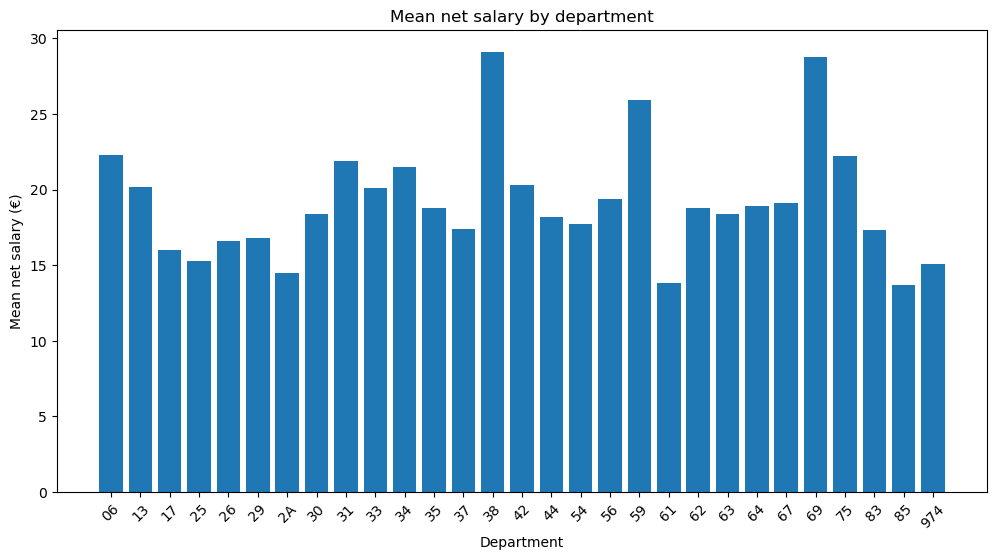

In [13]:
plt.figure(figsize=(12, 6))
plt.bar(df_sal_with_dept_filtered['department_code'], df_sal_with_dept_filtered['mean net salary (MNS)'])
plt.xlabel('Department')
plt.ylabel('Mean net salary (€)')
plt.title('Mean net salary by department')
plt.xticks(rotation=45)
plt.show()

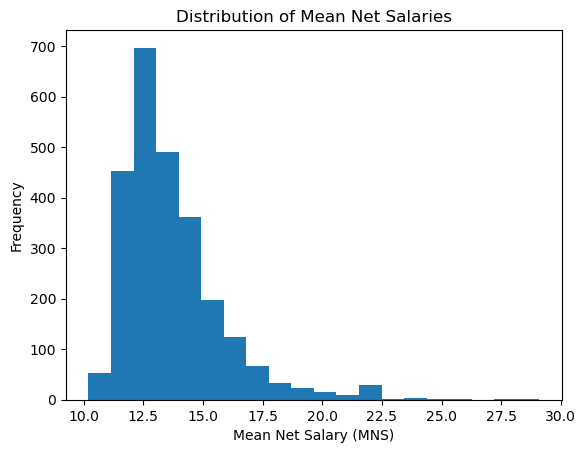

In [14]:
# Create a histogram
plt.hist(df_sal_with_dept_filtered['mean net salary (MNS)'], bins=20)

# Add axis labels and a title
plt.xlabel('Mean Net Salary (MNS)')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Net Salaries')

# Show the plot
plt.show()
